## Analisis de automoviles (mtcars)

#### Carga de bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())
os.chdir("/Users/heinerleivagmail.com")

/Users/heinerleivagmail.com


#### Carga de datos

In [5]:
data = pd.read_csv("mtcars.csv", sep = ".", delimiter = ",")

#### Exploracion Dataset

In [19]:
data.rename(columns={'model': 'names'}, inplace=True)

In [20]:
data.head(5)

,names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### Medidas de centralizacion

In [24]:
print(data.mean()) # ha hecho la media de todas las variables numericas, pero ojo hay unas que son categorias

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64


In [25]:
# Media por filas
print(data.mean(axis = 1))

0     29.907273
1     29.981364
2     23.598182
3     38.739545
4     53.664545
5     35.049091
6     59.720000
7     24.634545
8     27.233636
9     31.860000
10    31.787273
11    46.430909
12    46.500000
13    46.350000
14    66.232727
15    66.058545
16    65.972273
17    19.440909
18    17.742273
19    18.814091
20    24.888636
21    47.240909
22    46.007727
23    58.752727
24    57.379545
25    18.928636
26    24.779091
27    24.880273
28    60.971818
29    34.508182
30    63.155455
31    26.262727
dtype: float64


In [26]:
print(data.median())

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64


In [27]:
print(data.mode())

                  names   mpg  cyl   disp     hp  drat    wt   qsec   vs   am  \
0           AMC Javelin  10.4  8.0  275.8  110.0  3.07  3.44  17.02  0.0  0.0   
1    Cadillac Fleetwood  15.2  NaN    NaN  175.0  3.92   NaN  18.90  NaN  NaN   
2            Camaro Z28  19.2  NaN    NaN  180.0   NaN   NaN    NaN  NaN  NaN   
3     Chrysler Imperial  21.0  NaN    NaN    NaN   NaN   NaN    NaN  NaN  NaN   
4            Datsun 710  21.4  NaN    NaN    NaN   NaN   NaN    NaN  NaN  NaN   
5      Dodge Challenger  22.8  NaN    NaN    NaN   NaN   NaN    NaN  NaN  NaN   
6            Duster 360  30.4  NaN    NaN    NaN   NaN   NaN    NaN  NaN  NaN   
7          Ferrari Dino   NaN  NaN    NaN    NaN   NaN   NaN    NaN  NaN  NaN   
8              Fiat 128   NaN  NaN    NaN    NaN   NaN   NaN    NaN  NaN  NaN   
9             Fiat X1-9   NaN  NaN    NaN    NaN   NaN   NaN    NaN  NaN  NaN   
10       Ford Pantera L   NaN  NaN    NaN    NaN   NaN   NaN    NaN  NaN  NaN   
11          Honda Civic   Na

#### Medidas versus distribuciones

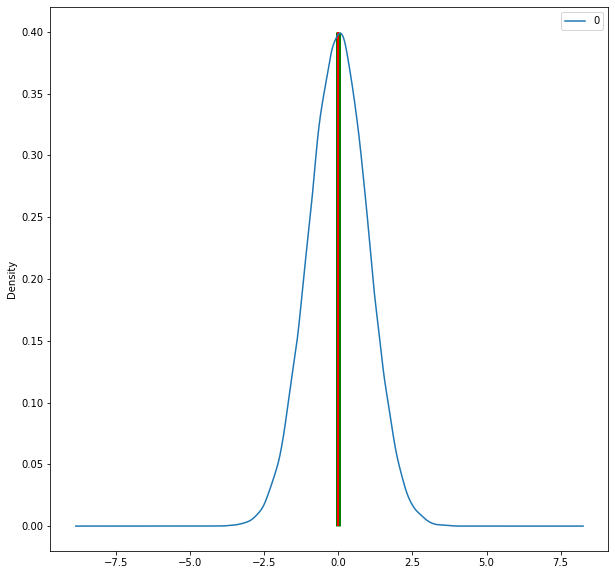

In [32]:
norm_data = pd.DataFrame(np.random.normal(size = 100000))
norm_data.plot(kind = "density", figsize = (10,10))
plt.vlines(norm_data.mean(), ymin= 0, ymax = 0.4, lw = 5.0, color = "green")
plt.vlines(norm_data.median(), ymin = 0, ymax = 0.4, lw = 2, color = "red")
plt.show()

# la distribucion es completamente normal

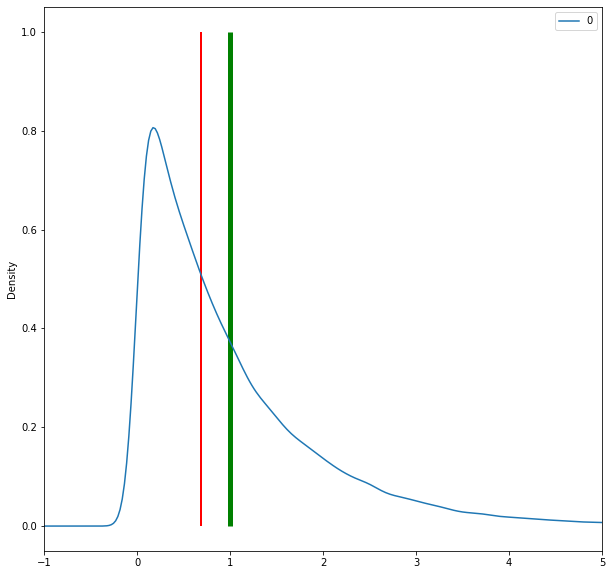

In [34]:
skewed_data = pd.DataFrame(np.random.exponential(size = 100000)) 
skewed_data .plot(kind = "density", figsize = (10,10), xlim = (-1, 5))
plt.vlines(skewed_data .mean(), ymin= 0, ymax = 1, lw = 5.0, color = "green")
plt.vlines(skewed_data .median(), ymin = 0, ymax = 1, lw = 2.0, color = "red")
plt.show()

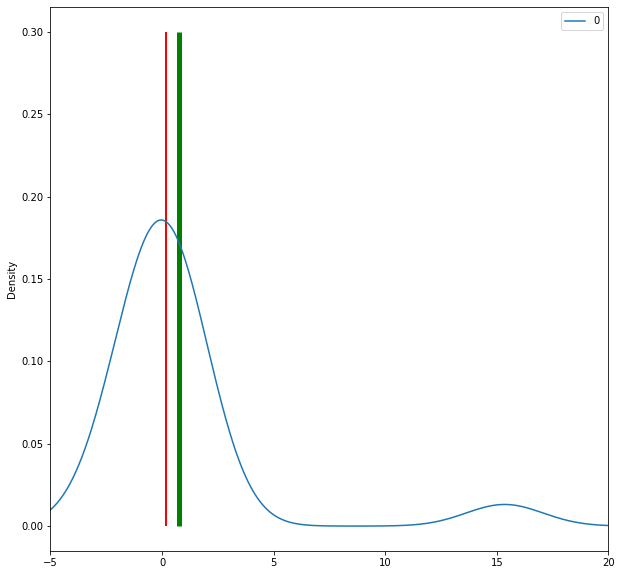

In [41]:
norm_data = np.random.normal(size = 50)
outliers = np.random.normal(15, size = 3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis = 0))
                             
combined_data.plot(kind = "density", figsize = (10,10), xlim = (-5, 20))
plt.vlines(combined_data.mean(), ymin= 0, ymax = 0.3, lw = 5.0, color = "green")
plt.vlines(combined_data.median(), ymin = 0, ymax = 0.3, lw = 2.0, color = "red")
plt.show()

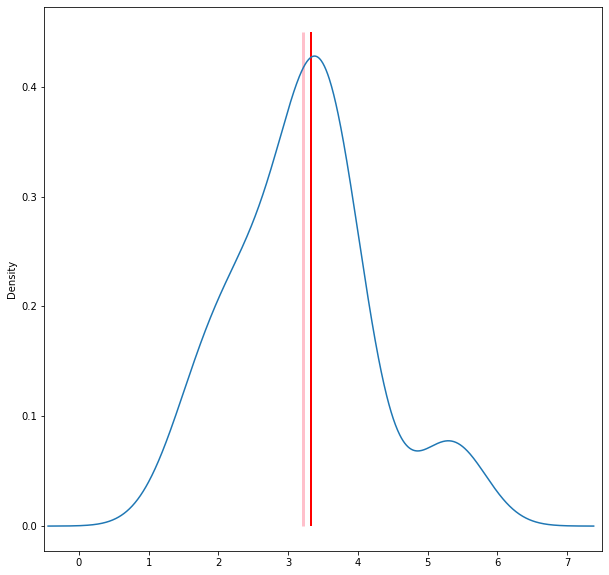

In [48]:
data["wt"].plot(kind = "density", figsize = (10,10), xlim = (-0.5, 7.5))
plt.vlines(data["wt"].mean(), ymin= 0, ymax = 0.45, lw = 3.0, color = "pink")
plt.vlines(data["wt"].median(), ymin = 0, ymax = 0.45, lw = 2.0, color = "red")
plt.show()

# Se puede interpretar que los datos no estan sesgados, porque se cumple con una distribuicion relativamente 
# normal, aunque hay mas caida de datos del lado derecho, y los valores decaen y luego vuelven a subir levemente
# es decir no bajan armoniosamente. 

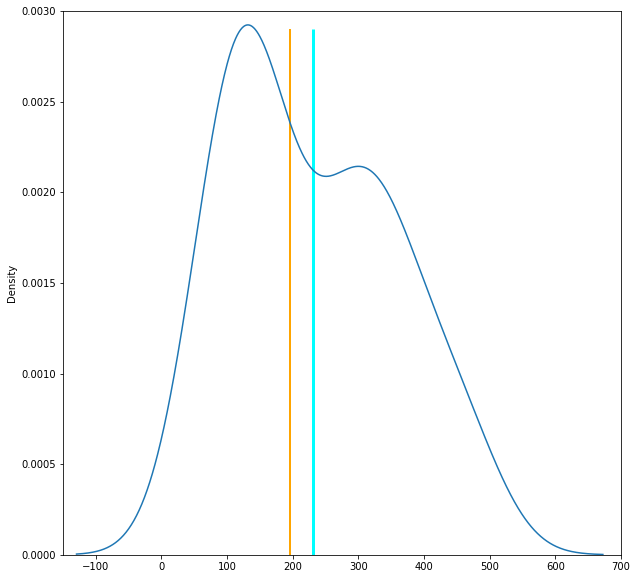

In [71]:
data["disp"].plot(kind = "density", figsize = (10,10), xlim = (-150, 700), ylim = (0, 0.0030))
plt.vlines(data["disp"].mean(), ymin= 0, ymax = 0.0029, lw = 3.0, color = "cyan")
plt.vlines(data["disp"].median(), ymin = 0, ymax = 0.0029, lw = 2.0, color = "orange")
plt.show()
# En este caso las medidas de tendencia central estan relativamente normales, aunque se ve que se tienden a halar
# la mediana y moda ligeramente a la derecha, es decir, hay cierto grado de sesgo positivo, pero tambien se debe
# a la presencia de mucha concentracion de datos entre 300 y 500. 

### Medidas de Dispersion 

Como divergen los datos de su centro. 

### Rango de 'mpg' y los 5 numeros

In [74]:
rang = max(data["mpg"]) - min(data["mpg"])
rang
# 23.5 entre el valor mas alto y el mas bajo. 

23.5

In [77]:
five_nums = [data["mpg"].quantile(0),
            data["mpg"].quantile(0.25),
            data["mpg"].quantile(0.50),
            data["mpg"].quantile(0.75),
            data["mpg"].quantile(1.0)]

In [78]:
print(five_nums)

[10.4, 15.425, 19.2, 22.8, 33.9]


In [80]:
print(data["mpg"].describe()) # es igual a hacer lo anterior

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64


In [83]:
print(data["mpg"].quantile(0.75) - data["mpg"].quantile(0.25)) # Rango intercuartilico.
# Asi es como se distribuyen estos datos. Recordar que como maximo debe ser a 1.5 tanto arriba como abajo. 

7.375


#### Creando Boxplots

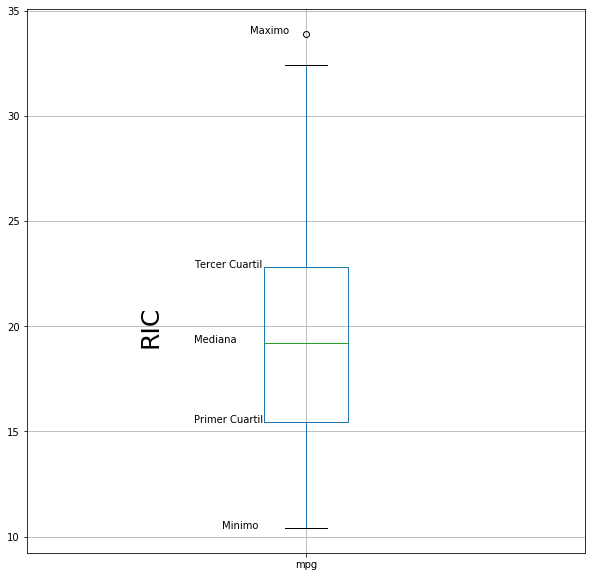

In [92]:
data.boxplot(column = "mpg", return_type = "axes", figsize = (10, 10))
plt.text(x = 0.8, y = data["mpg"].quantile(0.25), s = "Primer Cuartil")
plt.text(x = 0.8, y = data["mpg"].quantile(0.50), s = "Mediana")
plt.text(x = 0.8, y = data["mpg"].quantile(0.75), s = "Tercer Cuartil")
plt.text(0.85, y = data["mpg"].quantile(0.0), s = "Minimo")
plt.text(0.9, y = data["mpg"].quantile(1), s = "Maximo")

plt.text(x = 0.7, y = data["mpg"].quantile(0.5), s = "RIC", rotation = 90, size = 25)

plt.show()

### Varianza y desviacion tipica

### Recordar

* Varianza: La varianza de una distribucion es el promedio de las desviaciones (las diferencias) de los valores de la media 
al cuadrado, para que no se cancelen las unas con las otras.
* Desviacion tipica: es la raiz cuadrada de la varianza. 



In [100]:
print("La varianza es: \n" + str(data["mpg"].var()), 
      "\nLa Desviacion estandar es: \n" + str(data["mpg"].std()))
# Los datos se desvian de la media en 6.02 millas por galon tanto arriba como abajo. 

La varianza es: 
36.32410282258065 
La Desviacion estandar es: 
6.026948052089105


#### Desviacion Mediana Absoluta

##### Promedio Desviacion de la mediana

In [102]:
# Median Average Deviation
mad = abs(data["mpg"]-data["mpg"].median())
k = 1.4826

# Desviacion mediana absoluta
print(mad.median()*k)

# Esto es meno susceptible que varie por outliers, no como en el caso de la desviacion estandar que si se ve afectado por 
# valores extremos como los que se pudo ver en el boxplot.

5.411490000000001


### Medidas de forma

### Sesgo y la Curtosis

#### Recordar:

* Sesgo indica la simetria o asimetria de una distribucion, por ello tenemos sesgos positivos, negativos o nulos. 

* Curtosis: indica que tan "picuda" es la distribucion. 

Nos dicen como cambian los datos o varian conforme a la media. 

In [104]:
print(data["mpg"].skew()) # sesgo ligeramente positivo, es decir esta tirando a la derecha.

0.6723771376290805


In [106]:
print(data["mpg"].kurt()) # esta bastante tirando a 0, es decir, es bastante neutro, es decir, no podemos decir que hay
# un valor que destaque que hale a los demas. 

-0.0220062914240855


#### Ejemplo: 

Normal, Sesgo = -0.005072, Curtosis = -0.012815
Normal+Exp, Sesgo = 1.012370, Curtosis = 1.396471
Uniforme, Sesgo = -0.002823, Curtosis = -1.200765
Suma de Exp, Sesgo = -0.036302, Curtosis = 2.772439


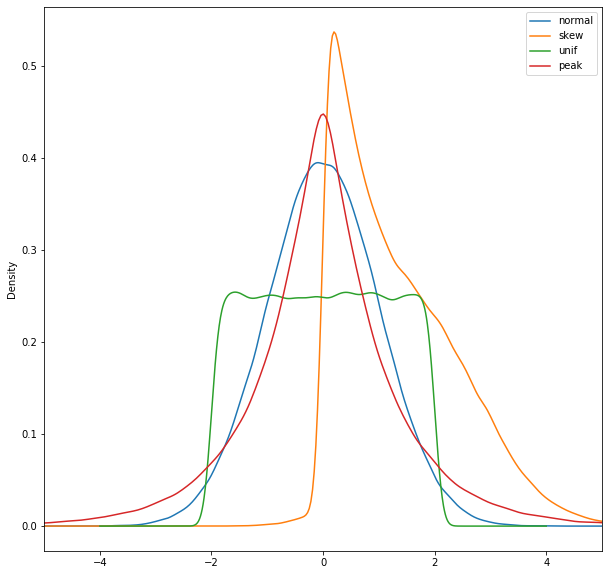

In [118]:
norm = np.random.normal(size = 100000)
skew = np.concatenate((np.random.normal(size = 35000) + 2, 
                     np.random.exponential(size = 65000)), axis =0)
unif = np.random.uniform(-2, 2, size = 100000)
peak = np.concatenate((np.random.exponential(size = 50000), 
                      np.random.exponential(size = 50000)*(-1)), 
                     axis = 0)
datos = pd.DataFrame({
    "normal": norm,
    "skew":skew,
    "unif": unif, 
    "peak": peak
})

datos.plot(kind = "density", figsize = (10, 10), xlim = (-5,5))

print("Normal, Sesgo = %f, Curtosis = %f"%(datos["normal"].skew(), datos["normal"].kurt()))
print("Normal+Exp, Sesgo = %f, Curtosis = %f"%(datos["skew"].skew(), datos["skew"].kurt()))
print("Uniforme, Sesgo = %f, Curtosis = %f"%(datos["unif"].skew(), datos["unif"].kurt()))
print("Suma de Exp, Sesgo = %f, Curtosis = %f"%(datos["peak"].skew(), datos["peak"].kurt()))
plt.show()

# Ver que la normal tiene la curtosis en 0 y el sesgo en 0, es decir, estan bien distribuidos con respecto a su media.
# Ver que para la normal con exponencial la curtosis esta bastante picuda y esta sesgada a la derecha, es decir positivo. 
# Ver que en la uniforme la curtosis no tiene pinchos pero es negativo, porque mas bien es mas bien muy aplanada. 
# Ver que en la Exponencial mas sesgo, la curtosis es positiva y es alto, porque la distribucion es picuda.